# 0. Import và cài đặt thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 13.8 MB/s eta 0:00:00


# 1. Tính các đặc trung của bộ dữ liệu

In [139]:
data = pd.read_csv('combinedgirder.csv', index_col='No')
data

,tw,a,hw,fyw,tf,bf,fyf,Ss,bl,tst,bst,Pu
No,,,,,,,,,,,,
1,5.0,1000.0,700.0,392.0,20.0,225.0,355.0,200,75,5.0,60.0,699.1
2,5.0,1000.0,700.0,392.0,20.0,225.0,355.0,200,125,5.0,60.0,507.4
3,5.0,1000.0,700.0,392.0,20.0,225.0,355.0,200,125,10.0,80.0,520.6
4,5.0,1000.0,700.0,392.0,20.0,225.0,355.0,200,75,10.0,80.0,559.9
5,5.0,1000.0,700.0,392.0,20.0,225.0,355.0,200,100,10.0,80.0,582.1
...,...,...,...,...,...,...,...,...,...,...,...,...
166,4.0,500.0,500.0,324.0,8.0,120.0,325.0,50,100,30.0,8.0,183.0
167,4.0,500.0,500.0,320.5,8.0,120.0,315.0,25,100,30.0,8.0,180.0
168,4.0,500.0,500.0,327.5,8.0,120.0,321.0,100,100,30.0,8.0,225.0


In [4]:
# Xuất ra bảng mô tả bộ dữ liệu
df_describe = data.describe()
df_describe.to_csv('summary_data.csv')
df_describe

,tw,a,hw,fyw,tf,bf,fyf,Ss,bl,tst,bst,Pu
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,3.820588,931.625294,635.027059,307.121176,11.891588,136.081765,302.727647,93.294118,123.958824,6.918824,43.973529,227.759294
std,1.391177,617.907850,200.179297,69.342219,6.669926,63.272974,67.965945,95.702179,59.441320,5.668401,25.019397,176.169129
min,2.000000,500.000000,500.000000,191.000000,5.000000,50.000000,235.200000,25.000000,50.000000,2.000000,8.000000,29.000000
25%,2.200000,500.000000,500.000000,252.000000,8.000000,118.525000,262.000000,50.000000,100.000000,5.000000,24.675000,76.500000
50%,4.000000,622.500000,501.250000,304.000000,12.000000,120.000000,279.500000,50.000000,100.000000,5.050000,40.000000,197.000000
75%,5.000000,1042.500000,799.500000,361.500000,12.300000,150.000000,309.000000,100.000000,150.000000,8.100000,60.000000,298.250000
max,6.000000,3000.000000,1274.000000,483.000000,40.000000,300.500000,485.000000,690.000000,327.000000,30.000000,110.000000,777.900000


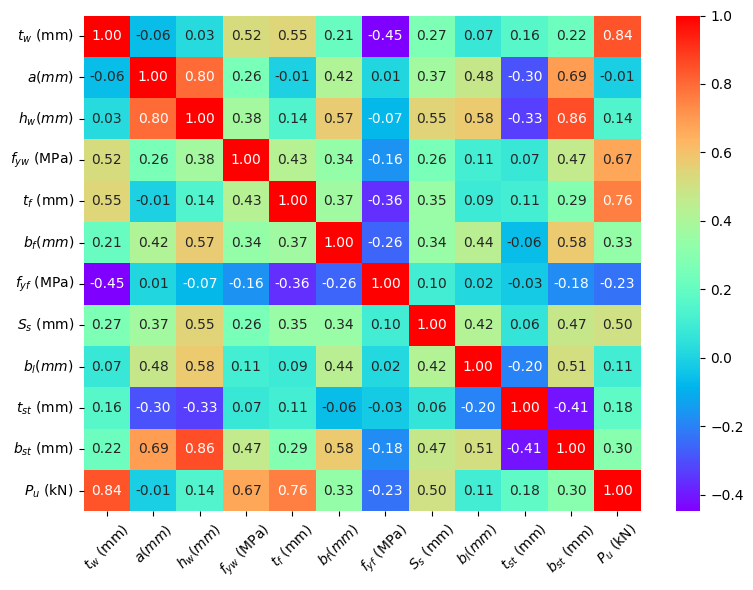

In [5]:
# Vẽ biểu đồ peason
pearson_corr = data.corr(method='pearson')
new_labels = [
    r'$t_{w}$ (mm)', r'$a (mm)$', r'$h_{w} (mm)$', r'$f_{yw}$ (MPa)',
    r'$t_{f}$ (mm)', r'$b_{f} (mm)$', r'$f_{yf}$ (MPa)',
    r'$S_{s}$ (mm)',r'$b_{l} (mm)$', r'$t_{st}$ (mm)', r'$b_{st}$ (mm)',
    r"$P_{u}$ (kN)"
]
# Cập nhật tên hàng và cột cho Pearson
pearson_corr.index = new_labels
pearson_corr.columns = new_labels
# Plot heatmap Pearson Correlation
plt.figure(figsize=(8, 6)) # vẽ đồ thị ( kích thước = 10x8)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="rainbow", cbar_kws={'shrink': 1})
# plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
# plt.subplots_adjust(left = 0.2, right=0.9, top=0.9, bottom=0.1)
# plt.savefig('data.svg', format='svg')
plt.savefig('data_peason.png', format='png', dpi=1000)

plt.show()

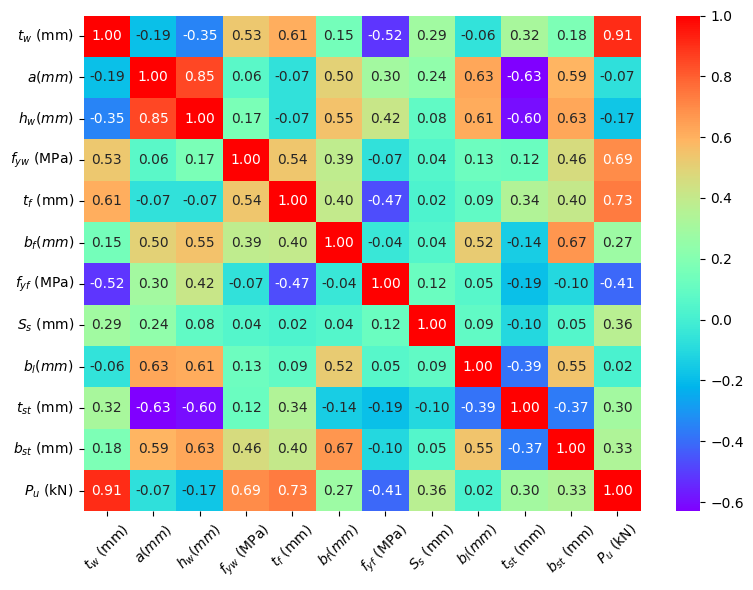

In [6]:
# Vẽ biểu đồ spearman
pearson_corr = data.corr(method='spearman')
# Cập nhật tên hàng và cột cho Pearson
pearson_corr.index = new_labels
pearson_corr.columns = new_labels
# Plot heatmap Pearson Correlation
plt.figure(figsize=(8, 6)) # vẽ đồ thị ( kích thước = 10x8)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="rainbow", cbar_kws={'shrink': 1})
# plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
# plt.subplots_adjust(left = 0.2, right=0.9, top=0.9, bottom=0.1)
# plt.savefig('data.svg', format='svg')
plt.savefig('data_spearman.png', format='png', dpi=1000)

plt.show()

# 2. Huấn luyện các model machine learning

In [181]:
# Chia bộ dữ liệu
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('combinedgirder.csv', index_col='No')

# Chia thành input và output:
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.15, random_state=42)

# Normalize dữ liệu:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 2.1. Dùng thuật toán tối ưu DE

In [8]:
# Thuật toán DT
from mealpy import FloatVar, DE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np
import pandas as pd

# Hàm mục tiêu

def objective_func(x):
    max_depth = int(x[0])
    min_samples_split = int(x[1])
    min_samples_leaf = int(x[2])
    max_features = x[3]
    criterion = 'squared_error' if x[4] < 0.5 else 'friedman_mse'

    model = DecisionTreeRegressor(
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, max_features=max_features, criterion=criterion,
        random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [1, 2, 1, 0.1, 0]
ub = [20, 20, 10, 1.0, 1]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = DE.OriginalDE(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = DecisionTreeRegressor(
    max_depth=int(optimizer.g_best.solution[0]),
    min_samples_split=int(optimizer.g_best.solution[1]),
    min_samples_leaf=int(optimizer.g_best.solution[2]),
    max_features=optimizer.g_best.solution[3],
    criterion='squared_error' if optimizer.g_best.solution[4] < 0.5 else 'friedman_mse',
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_dt_de')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train)** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test)** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_dt_de.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file csv

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns) # X-train ban đầu
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_dt_de.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_dt_de.csv', index=False)


INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 54.87479051497009, Global best: 54.87479051497009, Runtime: 0.13861 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 54.87479051497009, Global best: 54.87479051497009, Runtime: 0.15426 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 54.87479051497009, Global best: 54.87479051497009, Runtime: 0.13792 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 54.87479051497009, Global best: 54.87479051497009, Runtime: 0.13100 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 54.505519588891936, Global best: 54.505519588891936, Runtime: 0.13480 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 54.505519588891936, Gl

Train:
RMSE: 58.157308034563 MAE: 34.86676814900499 R2: 0.8883856512279479
Test:
RMSE: 89.33730035852616 MAE: 47.01524387892809 R2: 0.7636811192632273


In [9]:
# Thuật toán RF
from sklearn.ensemble import RandomForestRegressor


# Hàm mục tiêu
def objective_func(x):
    n_estimators = int(x[0])
    max_depth = int(x[1])
    min_samples_split = int(x[2])
    min_samples_leaf = int(x[3])
    max_features = x[4]

    model = RandomForestRegressor(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        max_features=max_features, random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [50, 1, 2, 1, 0.1]  # n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features
ub = [500, 20, 20, 10, 1.0]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = DE.OriginalDE(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = RandomForestRegressor(
    n_estimators=int(optimizer.g_best.solution[0]),
    max_depth=int(optimizer.g_best.solution[1]),
    min_samples_split=int(optimizer.g_best.solution[2]),
    min_samples_leaf=int(optimizer.g_best.solution[3]),
    max_features=optimizer.g_best.solution[4],
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_rf_de')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả tối ưu
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_rf_de.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file CSV

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_rf_de.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_rf_de.csv', index=False)


INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 46.16860980967425, Global best: 46.16860980967425, Runtime: 10.89098 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 46.16860980967425, Global best: 46.16860980967425, Runtime: 8.99906 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 46.08976134221162, Global best: 46.08976134221162, Runtime: 8.60583 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 45.96726020869903, Global best: 45.96726020869903, Runtime: 6.39650 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 45.96726020869903, Global best: 45.96726020869903, Runtime: 5.80901 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 45.96726020869903, Glob

Train:
RMSE: 32.127132838888464 MAE: 19.60887346544259 R2: 0.9659391582934594
Test:
RMSE: 62.17101534122864 MAE: 39.93451283376142 R2: 0.8855518723727446


In [10]:
# Thuật toán GBT

from sklearn.ensemble import GradientBoostingRegressor


# Hàm mục tiêu
def objective_func(x):
    n_estimators = int(x[0])
    learning_rate = x[1]
    max_depth = int(x[2])
    min_samples_split = int(x[3])
    min_samples_leaf = int(x[4])

    model = GradientBoostingRegressor(
        n_estimators=n_estimators, learning_rate=learning_rate,
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [50, 0.01, 1, 2, 1]  # n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf
ub = [500, 0.3, 20, 20, 10]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = DE.OriginalDE(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = GradientBoostingRegressor(
    n_estimators=int(optimizer.g_best.solution[0]),
    learning_rate=optimizer.g_best.solution[1],
    max_depth=int(optimizer.g_best.solution[2]),
    min_samples_split=int(optimizer.g_best.solution[3]),
    min_samples_leaf=int(optimizer.g_best.solution[4]),
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_gbt_de')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả tối ưu
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_gbt_de.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file CSV

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_gbt_de.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_gbt_de.csv', index=False)


INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 42.670376126779, Global best: 42.670376126779, Runtime: 6.30101 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 42.670376126779, Global best: 42.670376126779, Runtime: 4.40325 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 40.55994645897609, Global best: 40.55994645897609, Runtime: 9.96944 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 39.63483685150044, Global best: 39.63483685150044, Runtime: 9.54110 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 39.63483685150044, Global best: 39.63483685150044, Runtime: 9.64829 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 39.63483685150044, Global best: 

Train:
RMSE: 17.717215558624446 MAE: 11.530229329692638 R2: 0.9896413686787984
Test:
RMSE: 30.347650444177987 MAE: 21.83633457257574 R2: 0.9727301393955384


In [11]:
# Thuật toán XGB
from xgboost import XGBRegressor


# Hàm mục tiêu
def objective_func(x):
    n_estimators = int(x[0])
    learning_rate = x[1]
    max_depth = int(x[2])
    min_child_weight = x[3]
    gamma = x[4]

    model = XGBRegressor(
        n_estimators=n_estimators, learning_rate=learning_rate,
        max_depth=max_depth, min_child_weight=min_child_weight,
        gamma=gamma, random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [50, 0.01, 1, 1, 0]  # n_estimators, learning_rate, max_depth, min_child_weight, gamma
ub = [500, 0.3, 20, 10, 5]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = DE.OriginalDE(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = XGBRegressor(
    n_estimators=int(optimizer.g_best.solution[0]),
    learning_rate=optimizer.g_best.solution[1],
    max_depth=int(optimizer.g_best.solution[2]),
    min_child_weight=optimizer.g_best.solution[3],
    gamma=optimizer.g_best.solution[4],
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_xgb_de')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả tối ưu
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_xgb_de.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file CSV

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_xgb_de.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_xgb_de.csv', index=False)


INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 39.91809280289793, Global best: 39.91809280289793, Runtime: 1.72302 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 39.91809280289793, Global best: 39.91809280289793, Runtime: 2.12276 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 39.63150313452268, Global best: 39.63150313452268, Runtime: 1.78027 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 39.63150313452268, Global best: 39.63150313452268, Runtime: 1.65349 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 39.63150313452268, Global best: 39.63150313452268, Runtime: 3.72740 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 39.63150313452268, Globa

Train:
RMSE: 15.506583232128966 MAE: 10.095418912039863 R2: 0.9920650596355414
Test:
RMSE: 31.083152416795244 MAE: 21.658091178307167 R2: 0.9713923036211898


## 2.2. Dùng thuật toán tối ưu ALO

In [12]:
# Thuật toán DT
from mealpy import FloatVar, ALO
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np
import pandas as pd

# Hàm mục tiêu

def objective_func(x):
    max_depth = int(x[0])
    min_samples_split = int(x[1])
    min_samples_leaf = int(x[2])
    max_features = x[3]
    criterion = 'squared_error' if x[4] < 0.5 else 'friedman_mse'

    model = DecisionTreeRegressor(
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, max_features=max_features, criterion=criterion,
        random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [1, 2, 1, 0.1, 0]
ub = [20, 20, 10, 1.0, 1]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = ALO.DevALO(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = DecisionTreeRegressor(
    max_depth=int(optimizer.g_best.solution[0]),
    min_samples_split=int(optimizer.g_best.solution[1]),
    min_samples_leaf=int(optimizer.g_best.solution[2]),
    max_features=optimizer.g_best.solution[3],
    criterion='squared_error' if optimizer.g_best.solution[4] < 0.5 else 'friedman_mse',
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_dt_alo')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train)** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test)** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_dt_alo.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file csv

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns) # X-train ban đầu
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_dt_alo.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_dt_alo.csv', index=False)


INFO:mealpy.swarm_based.ALO.DevALO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 1, Current best: 52.168336310376525, Global best: 52.168336310376525, Runtime: 0.08138 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 2, Current best: 52.168336310376525, Global best: 52.168336310376525, Runtime: 0.08255 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 3, Current best: 52.168336310376525, Global best: 52.168336310376525, Runtime: 0.09867 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 4, Current best: 52.168336310376525, Global best: 52.168336310376525, Runtime: 0.08782 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 5, Current best: 52.168336310376525, Global best: 52.168336310376525, Runtime: 0.09303 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 6, Current best: 52.168336310376525, Global best: 52.168336310376525, Runtime: 0.08582 seconds
INFO:m

Train:
RMSE: 47.12656517067794 MAE: 24.501226851851854 R2: 0.9267102884348773
Test:
RMSE: 113.34700661154422 MAE: 61.16272893772895 R2: 0.6195891612430273


In [13]:
# Thuật toán RF
from sklearn.ensemble import RandomForestRegressor


# Hàm mục tiêu
def objective_func(x):
    n_estimators = int(x[0])
    max_depth = int(x[1])
    min_samples_split = int(x[2])
    min_samples_leaf = int(x[3])
    max_features = x[4]

    model = RandomForestRegressor(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        max_features=max_features, random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [50, 1, 2, 1, 0.1]  # n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features
ub = [500, 20, 20, 10, 1.0]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = ALO.DevALO(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = RandomForestRegressor(
    n_estimators=int(optimizer.g_best.solution[0]),
    max_depth=int(optimizer.g_best.solution[1]),
    min_samples_split=int(optimizer.g_best.solution[2]),
    min_samples_leaf=int(optimizer.g_best.solution[3]),
    max_features=optimizer.g_best.solution[4],
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_rf_alo')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả tối ưu
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_rf_alo.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file CSV

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_rf_alo.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_rf_alo.csv', index=False)


INFO:mealpy.swarm_based.ALO.DevALO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 1, Current best: 50.70128430274872, Global best: 50.70128430274872, Runtime: 4.10969 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 2, Current best: 46.95280123429846, Global best: 46.95280123429846, Runtime: 6.26140 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 3, Current best: 40.705485441943765, Global best: 40.705485441943765, Runtime: 4.65813 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 4, Current best: 40.705485441943765, Global best: 40.705485441943765, Runtime: 3.88751 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 5, Current best: 40.0777641795481, Global best: 40.0777641795481, Runtime: 3.93327 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 6, Current best: 40.0777641795481, Global best: 40.0777641795481, Runtime: 3.25914 seconds
INFO:mealpy.swarm_

Train:
RMSE: 23.569001588674674 MAE: 12.760173761088684 R2: 0.9816686770201792
Test:
RMSE: 48.77673350625443 MAE: 31.490259822205488 R2: 0.929553698386577


In [14]:
# Thuật toán GBT

from sklearn.ensemble import GradientBoostingRegressor


# Hàm mục tiêu
def objective_func(x):
    n_estimators = int(x[0])
    learning_rate = x[1]
    max_depth = int(x[2])
    min_samples_split = int(x[3])
    min_samples_leaf = int(x[4])

    model = GradientBoostingRegressor(
        n_estimators=n_estimators, learning_rate=learning_rate,
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [50, 0.01, 1, 2, 1]  # n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf
ub = [500, 0.3, 20, 20, 10]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = ALO.DevALO(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = GradientBoostingRegressor(
    n_estimators=int(optimizer.g_best.solution[0]),
    learning_rate=optimizer.g_best.solution[1],
    max_depth=int(optimizer.g_best.solution[2]),
    min_samples_split=int(optimizer.g_best.solution[3]),
    min_samples_leaf=int(optimizer.g_best.solution[4]),
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_gbt_alo')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả tối ưu
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_gbt_alo.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file CSV

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_gbt_alo.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_gbt_alo.csv', index=False)


INFO:mealpy.swarm_based.ALO.DevALO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 1, Current best: 40.25795890939524, Global best: 40.25795890939524, Runtime: 8.57234 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 2, Current best: 39.19517451636199, Global best: 39.19517451636199, Runtime: 10.18673 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 3, Current best: 39.19517451636199, Global best: 39.19517451636199, Runtime: 8.37727 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 4, Current best: 39.19517451636199, Global best: 39.19517451636199, Runtime: 9.07902 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 5, Current best: 39.19517451636199, Global best: 39.19517451636199, Runtime: 9.50445 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 6, Current best: 39.19517451636199, Global best: 39.19517451636199, Runtime: 9.44413 seconds
INFO:mealpy.swarm

Train:
RMSE: 23.978928354720804 MAE: 15.502741803050943 R2: 0.9810254721435235
Test:
RMSE: 28.621123004724538 MAE: 19.93428055528255 R2: 0.975744730069881


In [15]:
# Thuật toán XGB
from xgboost import XGBRegressor


# Hàm mục tiêu
def objective_func(x):
    n_estimators = int(x[0])
    learning_rate = x[1]
    max_depth = int(x[2])
    min_child_weight = x[3]
    gamma = x[4]

    model = XGBRegressor(
        n_estimators=n_estimators, learning_rate=learning_rate,
        max_depth=max_depth, min_child_weight=min_child_weight,
        gamma=gamma, random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()

# Giới hạn các siêu tham số
lb = [50, 0.01, 1, 1, 0]  # n_estimators, learning_rate, max_depth, min_child_weight, gamma
ub = [500, 0.3, 20, 10, 5]

problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {"max_early_stop": 50}

optimizer = ALO.DevALO(epoch=20, pop_size=5)
optimizer.solve(problem_dict, termination=term_dict)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = XGBRegressor(
    n_estimators=int(optimizer.g_best.solution[0]),
    learning_rate=optimizer.g_best.solution[1],
    max_depth=int(optimizer.g_best.solution[2]),
    min_child_weight=optimizer.g_best.solution[3],
    gamma=optimizer.g_best.solution[4],
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(optimal_model, 'optimal_model_xgb_alo')

# Đánh giá mô hình
y_pred_train = optimal_model.predict(X_train)
y_pred_test = optimal_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train:")
print("RMSE:", rmse_train, "MAE:", mae_train, "R2:", r2_train)

print("Test:")
print("RMSE:", rmse_test, "MAE:", mae_test, "R2:", r2_test)

# Lưu kết quả tối ưu
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution_xgb_alo.csv', best_solution, delimiter=',', comments='')

# Lưu kết quả dự đoán thành file CSV

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results_xgb_alo.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results_xgb_alo.csv', index=False)


INFO:mealpy.swarm_based.ALO.DevALO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 1, Current best: 38.33517369859882, Global best: 38.33517369859882, Runtime: 1.28325 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 2, Current best: 38.33517369859882, Global best: 38.33517369859882, Runtime: 1.42682 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 3, Current best: 38.229540197260405, Global best: 38.229540197260405, Runtime: 2.45071 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 4, Current best: 38.229540197260405, Global best: 38.229540197260405, Runtime: 1.08911 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 5, Current best: 38.082455084332786, Global best: 38.082455084332786, Runtime: 0.75862 seconds
INFO:mealpy.swarm_based.ALO.DevALO:>>>Problem: P, Epoch: 6, Current best: 38.082455084332786, Global best: 38.082455084332786, Runtime: 0.81668 seconds
INFO:mealp

Train:
RMSE: 13.678562083871036 MAE: 8.174786205821569 R2: 0.9938256345672272
Test:
RMSE: 34.01033828514004 MAE: 23.649326471182015 R2: 0.9657504653396497


# 3. Vẽ biểu đồ so sánh giá trị dự đoán và thực tế

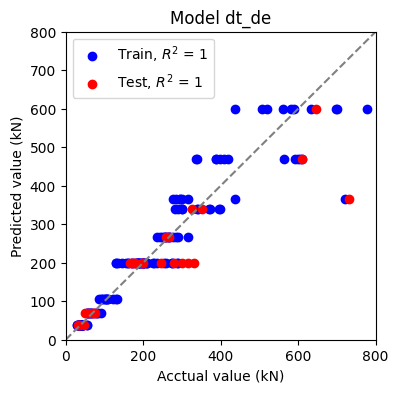

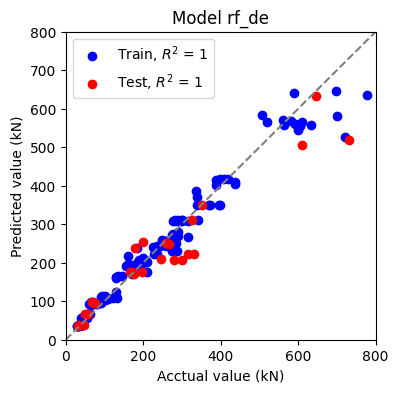

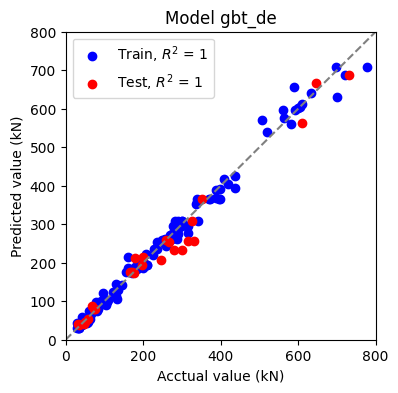

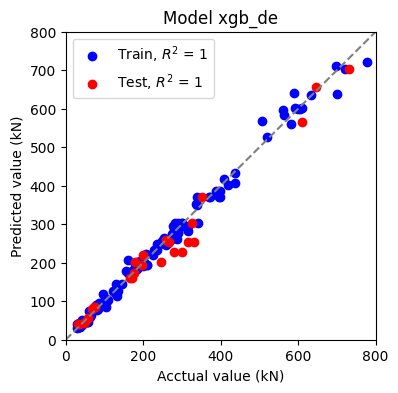

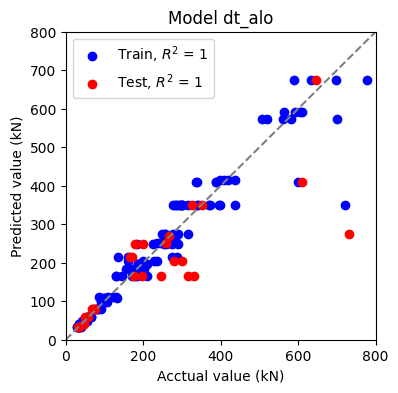

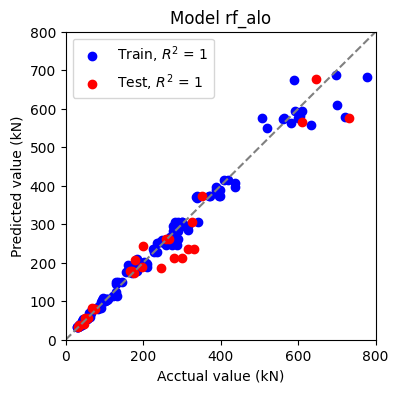

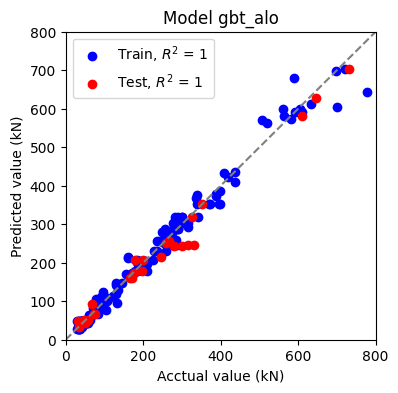

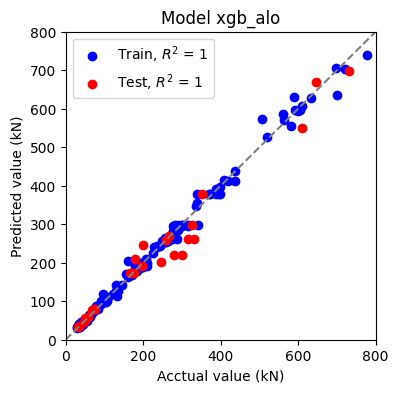

In [16]:
list_opt = ['de', 'alo']
list_model = ['dt', 'rf', 'gbt', 'xgb']
for opt in list_opt:
    for model in list_model:

        df_train = pd.read_csv(f'train_results_{model}_{opt}.csv')
        df_test = pd.read_csv(f'test_results_{model}_{opt}.csv')
        y_train_pred = df_train['y_pred_train']
        y_train_true = df_train['y_train']
        y_test_pred = df_test['y_pred_test']
        y_test_true = df_test['y_test']

        plt.figure(figsize=(4, 4))
        plt.plot([0,800],[0, 800], color='grey',linestyle='--')
        plt.scatter(y_train_true, y_train_pred, label=r'Train, $R^2$ = 1', color='blue')
        plt.scatter(y_test_true, y_test_pred, label='Test, $R^2$ = 1', color='red')
        plt.xlabel('Acctual value (kN)')
        plt.ylabel('Predicted value (kN)')
        plt.xlim(0, 800)
        plt.ylim(0, 800)
        plt.title(f'Model {model}_{opt}')

        plt.legend()
        plt.show()

# 4. Phân tích độ nhạy của model bằng SHAP

In [170]:
import shap
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [171]:
# Chọn model XGB-DE để phân tích
model = joblib.load('optimal_model_xgb_de')

In [172]:
# SHAP Explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [173]:
shap_values

.values =
array([[-5.45417404e+00,  1.43075395e+00, -4.25846481e+00,
        -5.97785807e+00,  4.66546326e+01, -4.45408434e-01,
         2.90382171e+00, -8.31002903e+00,  1.73414650e+01,
        -5.53437090e+00, -1.12431030e+01],
       [-3.54202843e+01,  8.14492321e+00,  1.88436584e+01,
         4.80072117e+00, -4.06911516e+00,  1.18078208e+00,
         9.07170296e-01,  4.40605049e+01, -1.23508835e+01,
         1.14370942e+00,  1.45486987e+00],
       [ 2.10907974e+02,  1.56716359e+00, -4.76341391e+00,
         3.00205078e+01,  1.23450836e+02, -6.82222962e-01,
         3.16095185e+00, -7.31715488e+00,  2.62284970e+00,
        -1.13950377e+01, -8.11115360e+00],
       [-3.62820930e+01, -3.51276474e+01,  1.37935419e+01,
         4.56292725e+00, -4.28279972e+00,  7.78094530e-01,
         9.07170296e-01,  4.19494247e+01, -1.40565386e+01,
         1.07804942e+00,  1.45486987e+00],
       [-1.64239227e+02,  2.68008065e+00,  1.52125893e+01,
        -7.78203249e+00,  2.69547482e+01,  1.739572

In [174]:
name_feature = [
    r'$t_{w}$ (mm)', r'$a$ (mm)', r'$h_{w}$ (mm)', r'$f_{yw}$ (MPa)',
    r'$t_{f}$ (mm)', r'$b_{f}$ (mm)', r'$f_{yf}$ (MPa)',
    r'$S_{s}$ (mm)', r'$b_{l}$ (mm)', r'$t_{st}$ (mm)', r'$b_{st}$ (mm)',

]

In [175]:
shap_values.data = scaler.inverse_transform(shap_values.data)

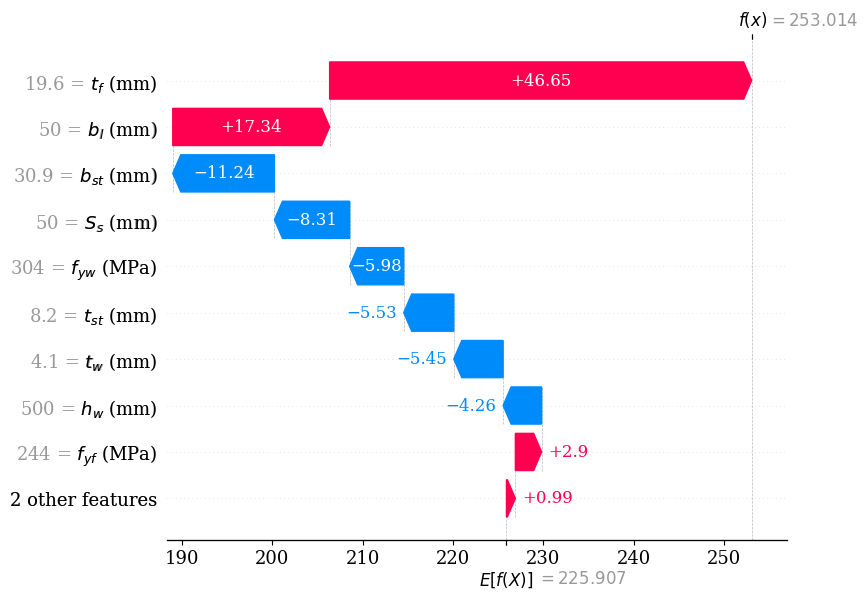

<Figure size 640x480 with 0 Axes>

In [176]:
# Cập nhật tên các features

shap_values.feature_names = [name_feature]

# Vẽ biểu đồ waterfall
shap.waterfall_plot(shap_values[0])
# Điều chỉnh font chữ và cỡ chữ
fig = plt.gcf()  # Lấy figure hiện tại
for text in fig.findobj(plt.Text):  # Duyệt qua tất cả các phần tử text
    text.set_fontname("Times New Roman")
    text.set_fontsize(10)

plt.show()

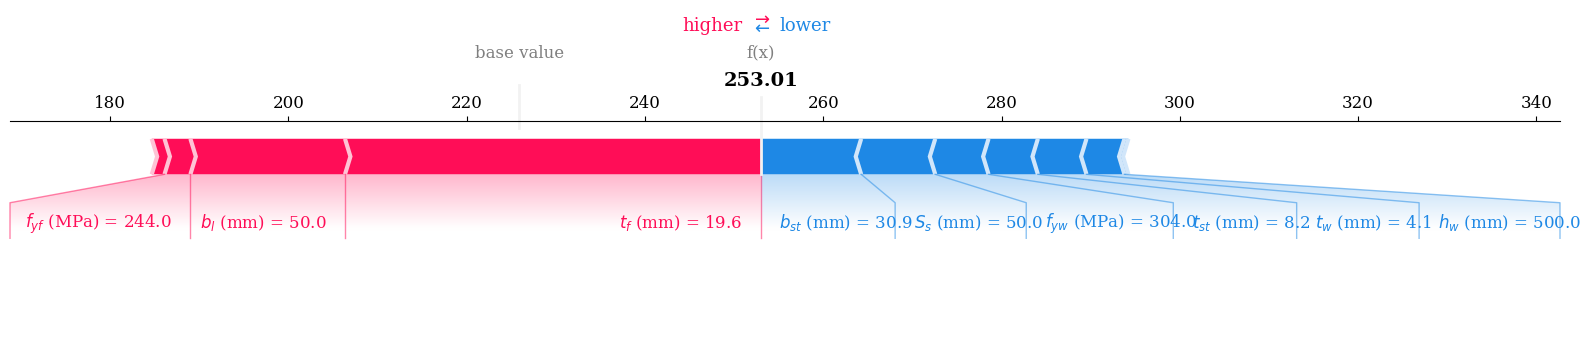

In [177]:
# If SHAP values are an Explanation object, extract the values
if isinstance(shap_values, shap.Explanation):
    shap_values = shap_values.values

X_test_shap = pd.DataFrame(scaler.inverse_transform(X_test))
X_test_shap.columns = name_feature
# Force plot for the first observation with matplotlib
# The expected_value is the model's expected output for the dataset
# The shap_values[0] represents the SHAP values for the first observation
# X_test.iloc[0, :] is the corresponding feature values for the first observation
shap.force_plot(explainer.expected_value, shap_values[0], X_test_shap.iloc[0, :], matplotlib=True)

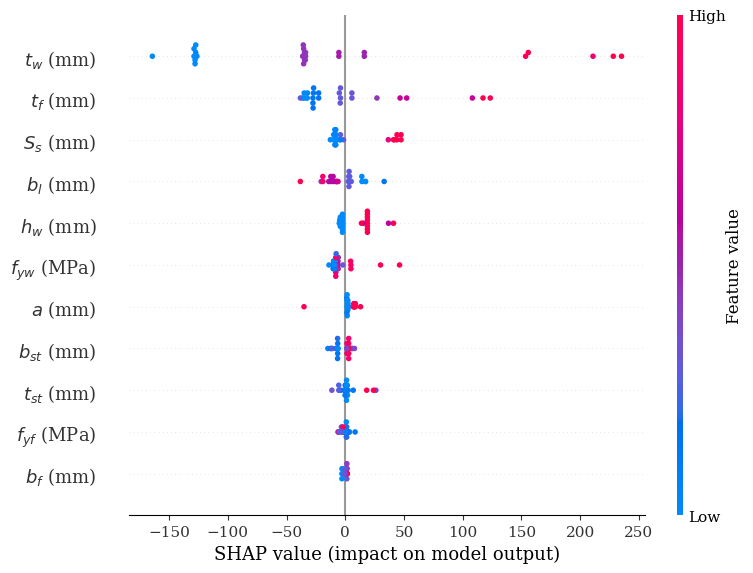

<Figure size 640x480 with 0 Axes>

In [178]:
shap.summary_plot(shap_values, X_test_shap)
# Điều chỉnh font chữ và cỡ chữ
fig = plt.gcf()  # Lấy figure hiện tại
for text in fig.findobj(plt.Text):  # Duyệt qua tất cả các phần tử text
    text.set_fontname("Times New Roman")
    text.set_fontsize(10)

plt.show()

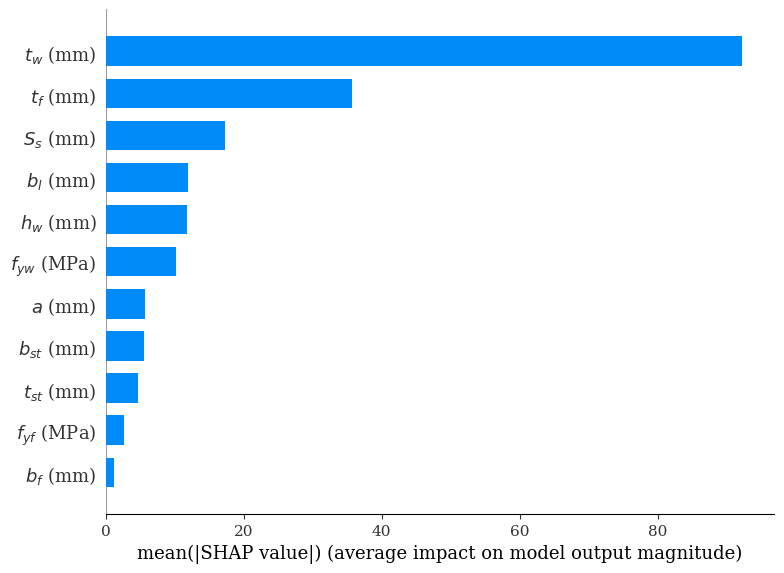

<Figure size 640x480 with 0 Axes>

In [179]:
shap.summary_plot(shap_values, X_test_shap, plot_type="bar")
# Điều chỉnh font chữ và cỡ chữ
fig = plt.gcf()  # Lấy figure hiện tại
for text in fig.findobj(plt.Text):  # Duyệt qua tất cả các phần tử text
    text.set_fontname("Times New Roman")
    text.set_fontsize(10)

plt.show()

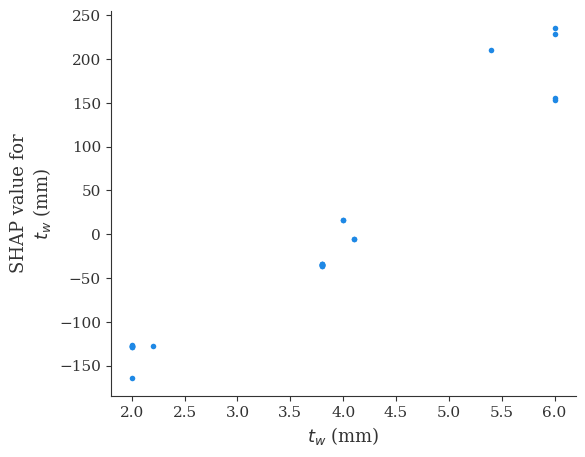

<Figure size 640x480 with 0 Axes>

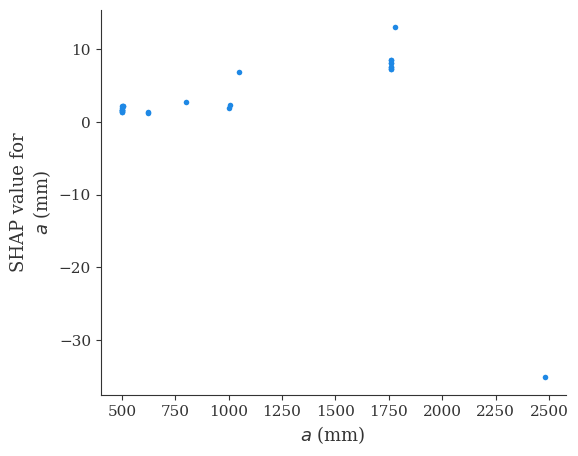

<Figure size 640x480 with 0 Axes>

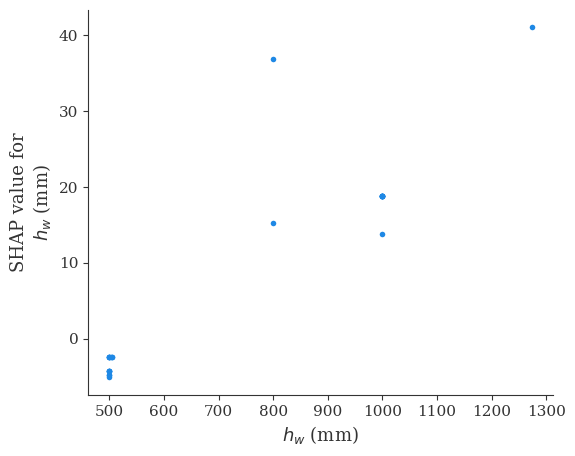

<Figure size 640x480 with 0 Axes>

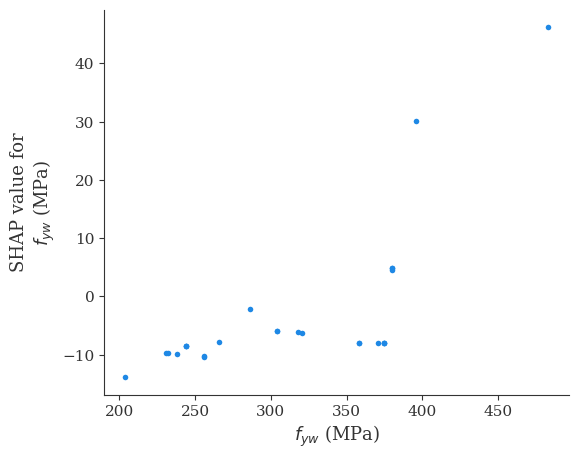

<Figure size 640x480 with 0 Axes>

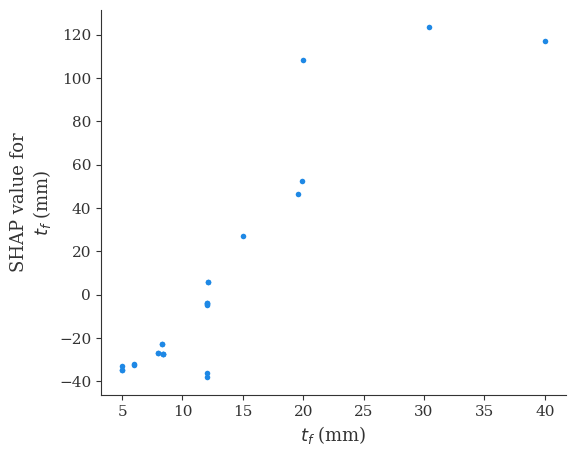

<Figure size 640x480 with 0 Axes>

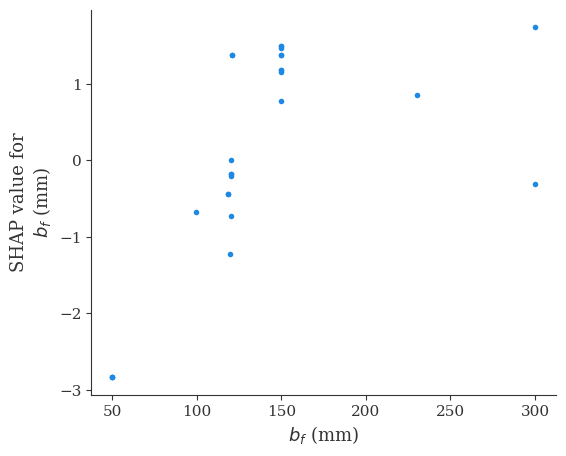

<Figure size 640x480 with 0 Axes>

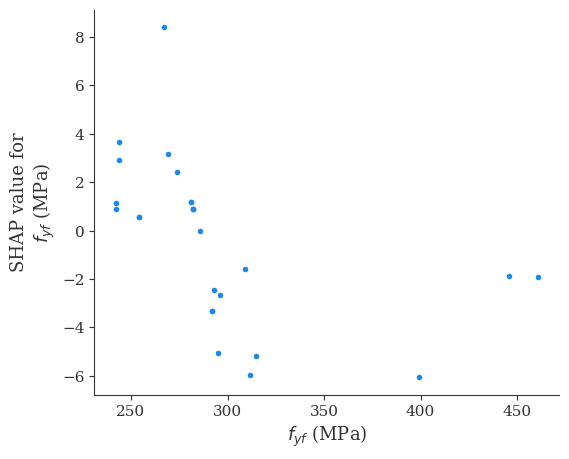

<Figure size 640x480 with 0 Axes>

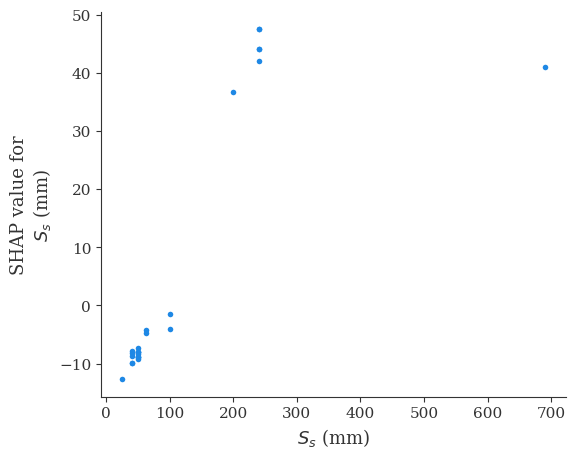

<Figure size 640x480 with 0 Axes>

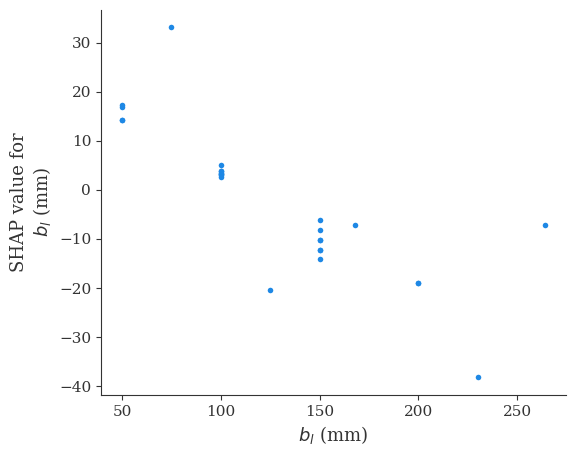

<Figure size 640x480 with 0 Axes>

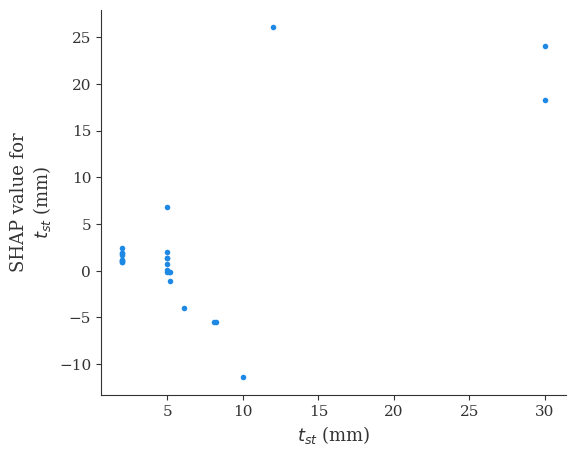

<Figure size 640x480 with 0 Axes>

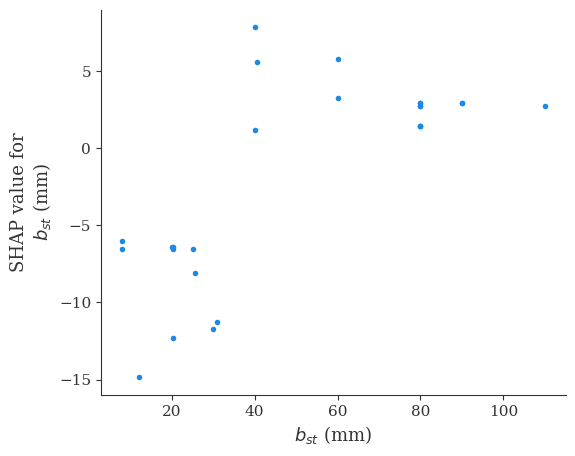

<Figure size 640x480 with 0 Axes>

In [180]:
for i in range(len(name_feature)):

    shap.dependence_plot(name_feature[i], shap_values, X_test_shap, interaction_index=None)

    # Điều chỉnh font chữ và cỡ chữ
    fig = plt.gcf()  # Lấy figure hiện tại
    for text in fig.findobj(plt.Text):  # Duyệt qua tất cả các phần tử text
        text.set_fontname("Times New Roman")
        text.set_fontsize(10)

    plt.show()